In [47]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For statistical data visualization
%matplotlib inline
from matplotlib import style  # For setting the style of the visualizations
style.use('ggplot')
import re  # For regular expressions
from nltk.tokenize import word_tokenize  # For tokenizing words
from nltk.stem import PorterStemmer  # For word stemming
from nltk.corpus import stopwords  # For removing stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud  # For generating word clouds
from sklearn.feature_extraction.text import CountVectorizer  # For text vectorization
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.naive_bayes import MultinomialNB  # For Naive Bayes classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For model evaluation

In [48]:
# Load the dataset and display the first few rows
df = pd.read_csv('amazon_alexa.tsv', sep='\t')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


# Exploratory Data Analysis (EDA):

In [23]:
# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


<AxesSubplot:xlabel='rating', ylabel='count'>

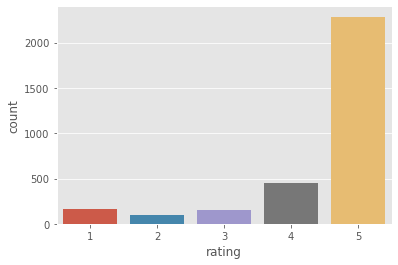

In [50]:
# Visualize the distribution of ratings using a count plot
sns.countplot(x='rating', data=df)

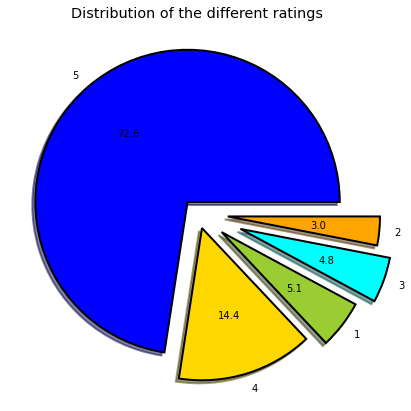

In [51]:
# Visualize the distribution of ratings using a pie chart
fig = plt.figure(figsize=(7,7))
colors = ("blue","gold","yellowgreen","cyan","orange")
wp = {'linewidth':2, 'edgecolor':'black'}
tags = df['rating'].value_counts()
explode = (0.1,0.1,0.2,0.3,0.2)
tags.plot(kind='pie', autopct='%1.1f',colors=colors, shadow=True,
          startangle=0, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of the different ratings')
plt.show()

<AxesSubplot:xlabel='count', ylabel='variation'>

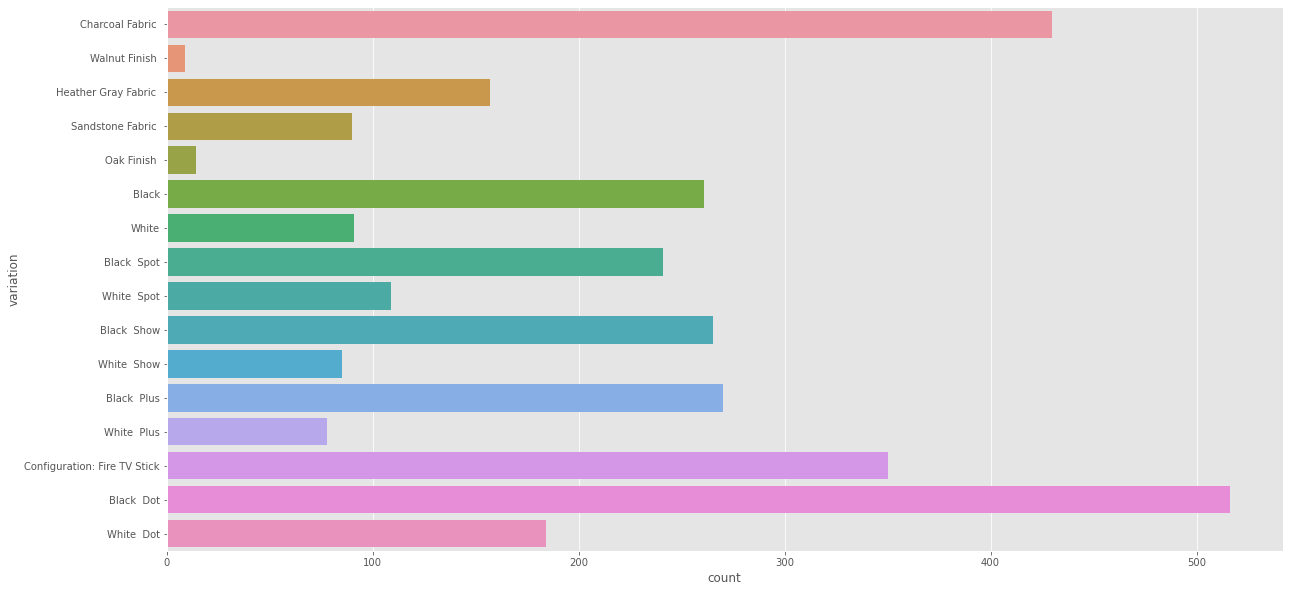

In [26]:
fig = plt.figure(figsize=(20,10))
sns.countplot(y="variation",data=df)

In [27]:
df['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

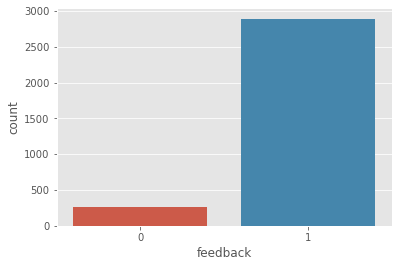

In [28]:
sns.countplot(x='feedback', data=df)
plt.show()

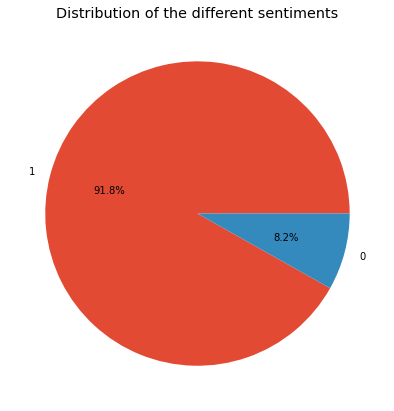

In [29]:
fig = plt.figure(figsize=(7,7))
tags = df['feedback'].value_counts()
tags.plot(kind='pie', autopct='%1.1f%%', label='')
plt.title("Distribution of the different sentiments")
plt.show()

# Data Preprocessing:

In [30]:
for i in range(10):
    print(df['verified_reviews'].iloc[i],"\n")

Love my Echo! 

Loved it! 

Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. 

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. 

Music 

I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. 

Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. 

I think this is the 5th one I've purchased. I'm 

In [52]:
#Function for text data processing
def data_processing(text):
    text = text.lower() # Convert text to lowercase
    text = re.sub(r"http\S+www\S+|https\S+", '', text, flags= re.MULTILINE) # Remove URLs
    text = re.sub(r'[^\w\s]','',text)#Remove punctuation
    text_tokens = word_tokenize(text) 
    
    # Tokenize the text
    filtered_text = [w for w in text_tokens if not w in stop_words] # Remove stopwords
    return " ".join(filtered_text)

In [32]:
df.verified_reviews = df['verified_reviews'].apply(data_processing)

In [33]:
#Function for stemming
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [34]:
df['verified_reviews'] = df['verified_reviews'].apply(lambda x: stemming(x))

In [35]:
for i in range(10):
    print(df['verified_reviews'].iloc[i],"\n")

love echo 

loved 

sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home 

lot fun thing 4 yr old learns dinosaurs control lights play games like categories nice sound playing music well 

music 

received echo gift needed another bluetooth something play music easily accessible found smart speaker cant wait see else 

without cellphone use many features ipad see use great alarm u r almost deaf hear alarm bedroom living room reason enough keep herit fun ask random questions hear response seem smartbon politics yet 

think 5th one ive purchased im working getting one every room house really like features offer specifily playing music echos controlling lights throughout house 

looks great 

love ive listened songs havent heard since childhood get news weather information great 



In [36]:
pos_reviews = df[df.feedback == 1]
pos_reviews.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,love echo,1
1,5,31-Jul-18,Charcoal Fabric,loved,1
2,4,31-Jul-18,Walnut Finish,sometimes playing game answer question correct...,1
3,5,31-Jul-18,Charcoal Fabric,lot fun thing 4 yr old learns dinosaurs contro...,1
4,5,31-Jul-18,Charcoal Fabric,music,1


In [40]:
X = df['verified_reviews']
Y = df['feedback']

In [41]:
# Vectorize the text data using CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df['verified_reviews'])

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [43]:
print("Size of x_train: ",(x_train.shape))
print("Size of y_train: ",(y_train.shape))
print("Size of x_test: ",(x_test.shape))
print("Size of y_test: ",(y_test.shape))

Size of x_train:  (2520, 4364)
Size of y_train:  (2520,)
Size of x_test:  (630, 4364)
Size of y_test:  (630,)


In [53]:
# Initialize and train the Multinomial Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

Test accuracy: 92.22%


In [55]:
# Make predictions on the test set
mnb_pred = mnb.predict(x_test)

In [54]:
# Evaluate the model performance
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc * 100))

Test accuracy: 92.22%


In [56]:
# Display confusion matrix and classification report
print(confusion_matrix(y_test, mnb_pred))
print("\n")
print(classification_report(y_test, mnb_pred))

[[ 15  43]
 [  6 566]]


              precision    recall  f1-score   support

           0       0.71      0.26      0.38        58
           1       0.93      0.99      0.96       572

    accuracy                           0.92       630
   macro avg       0.82      0.62      0.67       630
weighted avg       0.91      0.92      0.91       630

